In [12]:
import psycopg2
import pandas as pd
import sys
sys.modules.pop('lob_dataset')
from lob_dataset import *

In [3]:
# Connect to remote database
conn = psycopg2.connect(host="141.147.107.234",
                        database="crypto_data",
                        user="lob_user",
                        password="Taragona0")

# Open a cursor to perform database operations
cur = conn.cursor()

# Execute SQL query
query = """
    SELECT *
    FROM order_books
    WHERE timestamp >= '2025-01-01'
    AND timestamp <= '2025-01-20'
"""

query_full = """
    SELECT *
    FROM order_books
"""

# Convert query results to pandas dataframe
df = pd.read_sql_query(query, conn)
# df_full = pd.read_sql_query(query_full, conn)

# Close database connection
cur.close()
conn.close()



/var/folders/jp/qxxdpxxd2j7470p8w7v0ppfm0000gn/T/ipykernel_30993/4156791126.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [ ]:
# Derive close price based on bids and asks data for each timestamp
df['close_mid'] = df.apply(lambda x: (x['bids'][0][0] + x['asks'][0][0]) / 2, axis=1)


In [13]:
ds_LOB = LOBDataset2(df, ntile=20)
td =ds_LOB.tensor_data
x, y = ds_LOB[123]

/Users/alexb/Projects/LOB_collector/2_Data analysis and models/lob_dataset.py:43: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tensor_list = [self._to_tensor_snapshot(group) for _, group in df.resample(self.time_step)]


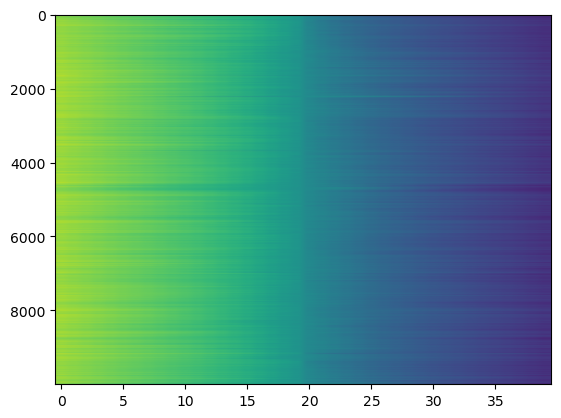

In [16]:
ds_LOB.plot_LOB(1, (0, 10000))